In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pylab as plt
import glob
import matplotlib.dates as mdates


In [99]:
def doPlot(verbiage, aggType,w,h):
    datas = []
    for f in glob.glob("./data/" + aggType + "/*.txt"):
        data = pd.read_csv(f,sep=" ")
        data['date'] = pd.to_datetime(data['date'])
        data = data.set_index(["date"])
        datas.append(data)

    isis_boxes = []
    total_boxes = []
    all_data = []
    counts = []
    labels = []
    plots = []
    c = 1

    for data in datas:
        d30 = data.resample('1D').sum()
        d30["isis_perc"] = d30.isis / d30.total
        d30.isis_perc = d30.isis_perc.fillna(0.0)
        isis_boxes.append(d30.isis_perc)
        #print d30.isis_perc.isnull().sum()
        total_boxes.append(d30.total + d30.target_total)
        all_data.append(d30)

        counts.append(c)
        c += 1
        labels.append(data.video[0])
        #plt.boxplot([d30.target_total, d30.target_isis, d30.target_happy, d30.target_angry, d30.target_sad])
        plots.append(d30[["target_total","target_isis","target_happy","target_angry","target_sad"]])

    plt.figure(1,figsize=(20,8))
    plt.subplot(111)

    #plt.plot(box.ewm(span=2).mean())
    #plt.legend()
    plt.boxplot(isis_boxes)
    plt.title(verbiage)

    #plt.boxplot(total_boxes)
    #plt.xticks(counts, labels)

    plt.figure(2, figsize=(w, h), dpi=80)
    ddd = []
    for i, box in enumerate(isis_boxes):
        plt.subplot(len(isis_boxes),4,4*i+1)
        #print box
        plt.hist(box,bins=40)
        #rm.head()
        #rm = pd.rolling_mean(box,window=7)
        #plt.hist(rm,bins=80)
        plt.ylabel(str(i+1),rotation='horizontal')
        plt.legend(["target isis"],loc='upper right')
        plt.title("Daily")

        ax = plt.subplot(len(isis_boxes),4,4*i+2)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
        plt.plot(box)
        #plt.plot(total_boxes[i])
        #plt.plot(all_data[i].target_happy)
        #plt.plot(all_data[i].target_sad + all_data[i].target_angry)
        plt.legend(["target isis"],loc='upper left')
        plt.ylabel(str(i+1),rotation='horizontal')
        plt.title("Daily")

        plt.subplot(len(isis_boxes),4,4*i+3)
        plt.hist(box.rolling(min_periods=1,window=14,center=False).mean(),bins=40)
        plt.ylabel(str(i+1),rotation='horizontal')
        plt.legend(["target isis"],loc='upper right')
        plt.title("Rolling Mean (14D)")

        ax = plt.subplot(len(isis_boxes),4,4*i+4)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
        plt.plot(box.rolling(min_periods=1,window=14,center=False).mean())
        plt.plot(box.resample("7D").mean())
        for i in range(1,100):
            ddd.append((i, box.resample(str(i) + "D").sum().mean()))
        #print 7, box.resample("7D").mean().head(10), box.resample("7D").sum().head(10), box.head(10)
        plt.plot(box.ewm(halflife=14,ignore_na=False,min_periods=1,adjust=True).mean())
        plt.ylabel(str(i+1),rotation='horizontal')
        plt.title("Time Series Smoothing")
        plt.legend(["Rolling Mean (14D)","Weekly bins","Exp. Weight Mean"],loc='upper left')
        #.resample('3D').sum())

    #plt.savefig("hists.png")
    plt.show()
    pd.DataFrame(ddd,columns=["num","count"]).groupby("num").mean().to_csv("jtest.txt")
    return all_data

0
0


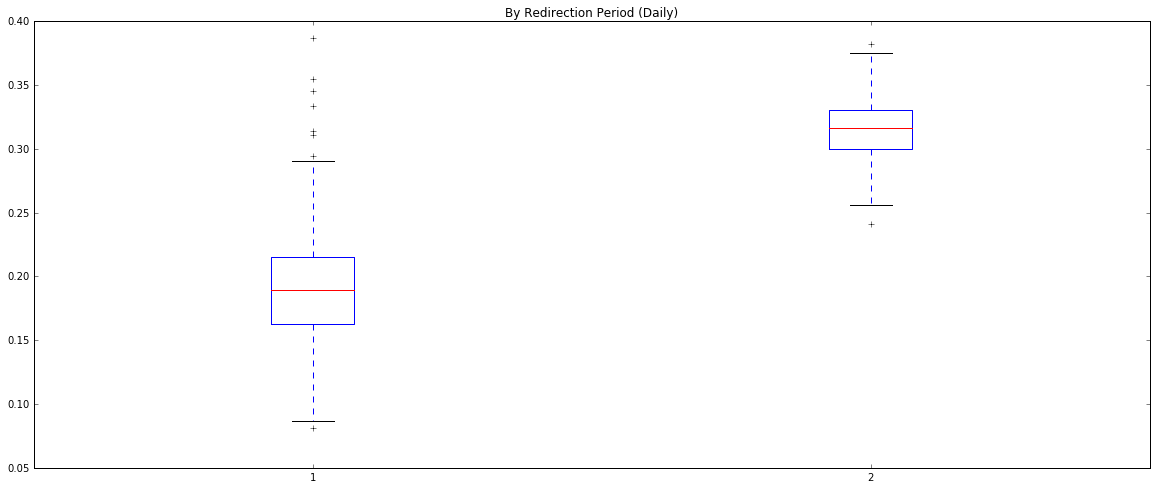

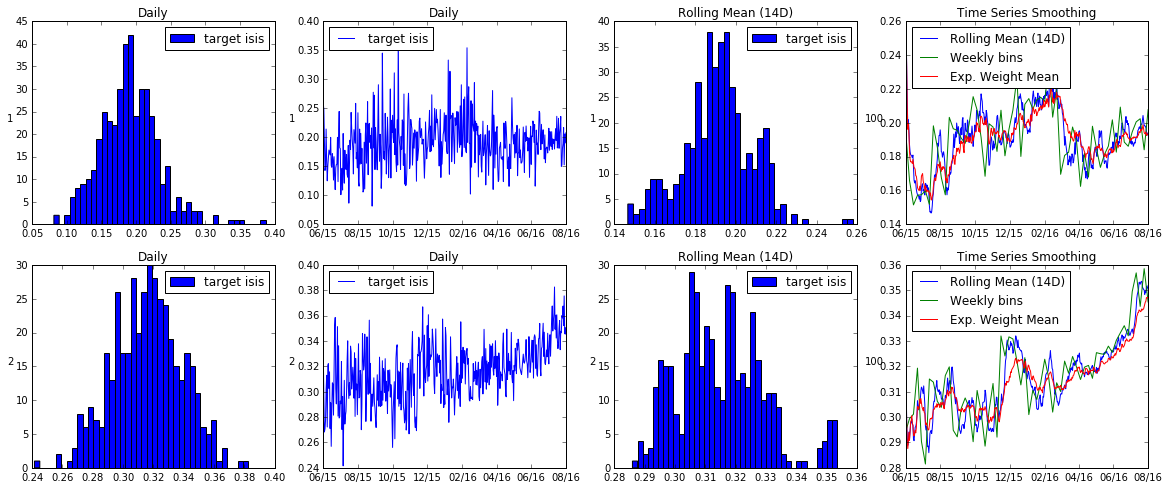

In [96]:
all_data = doPlot("By Redirection Period (Daily)","by_start_date_ci",20,8)

0
0
0
0
0
0
0
0
0
0


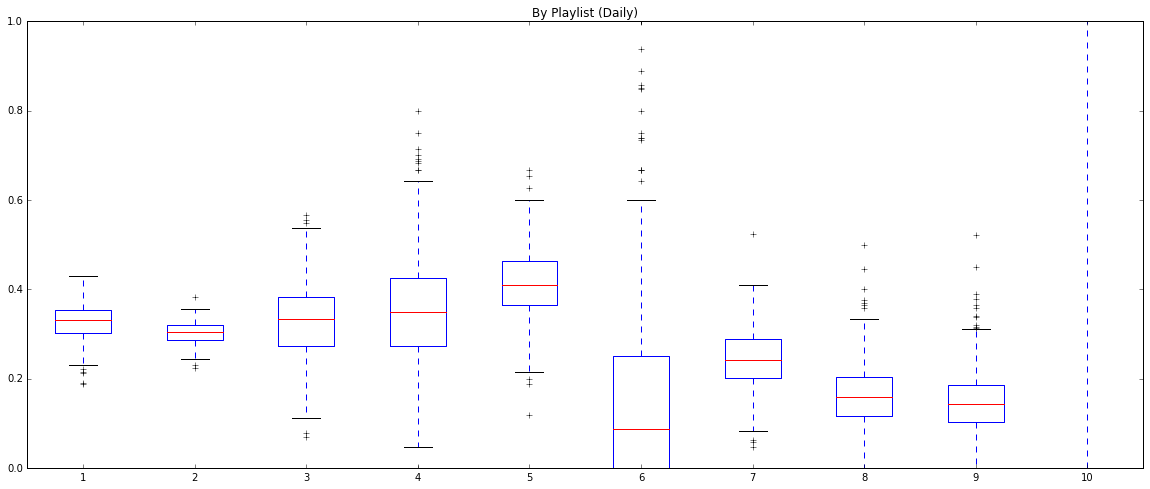

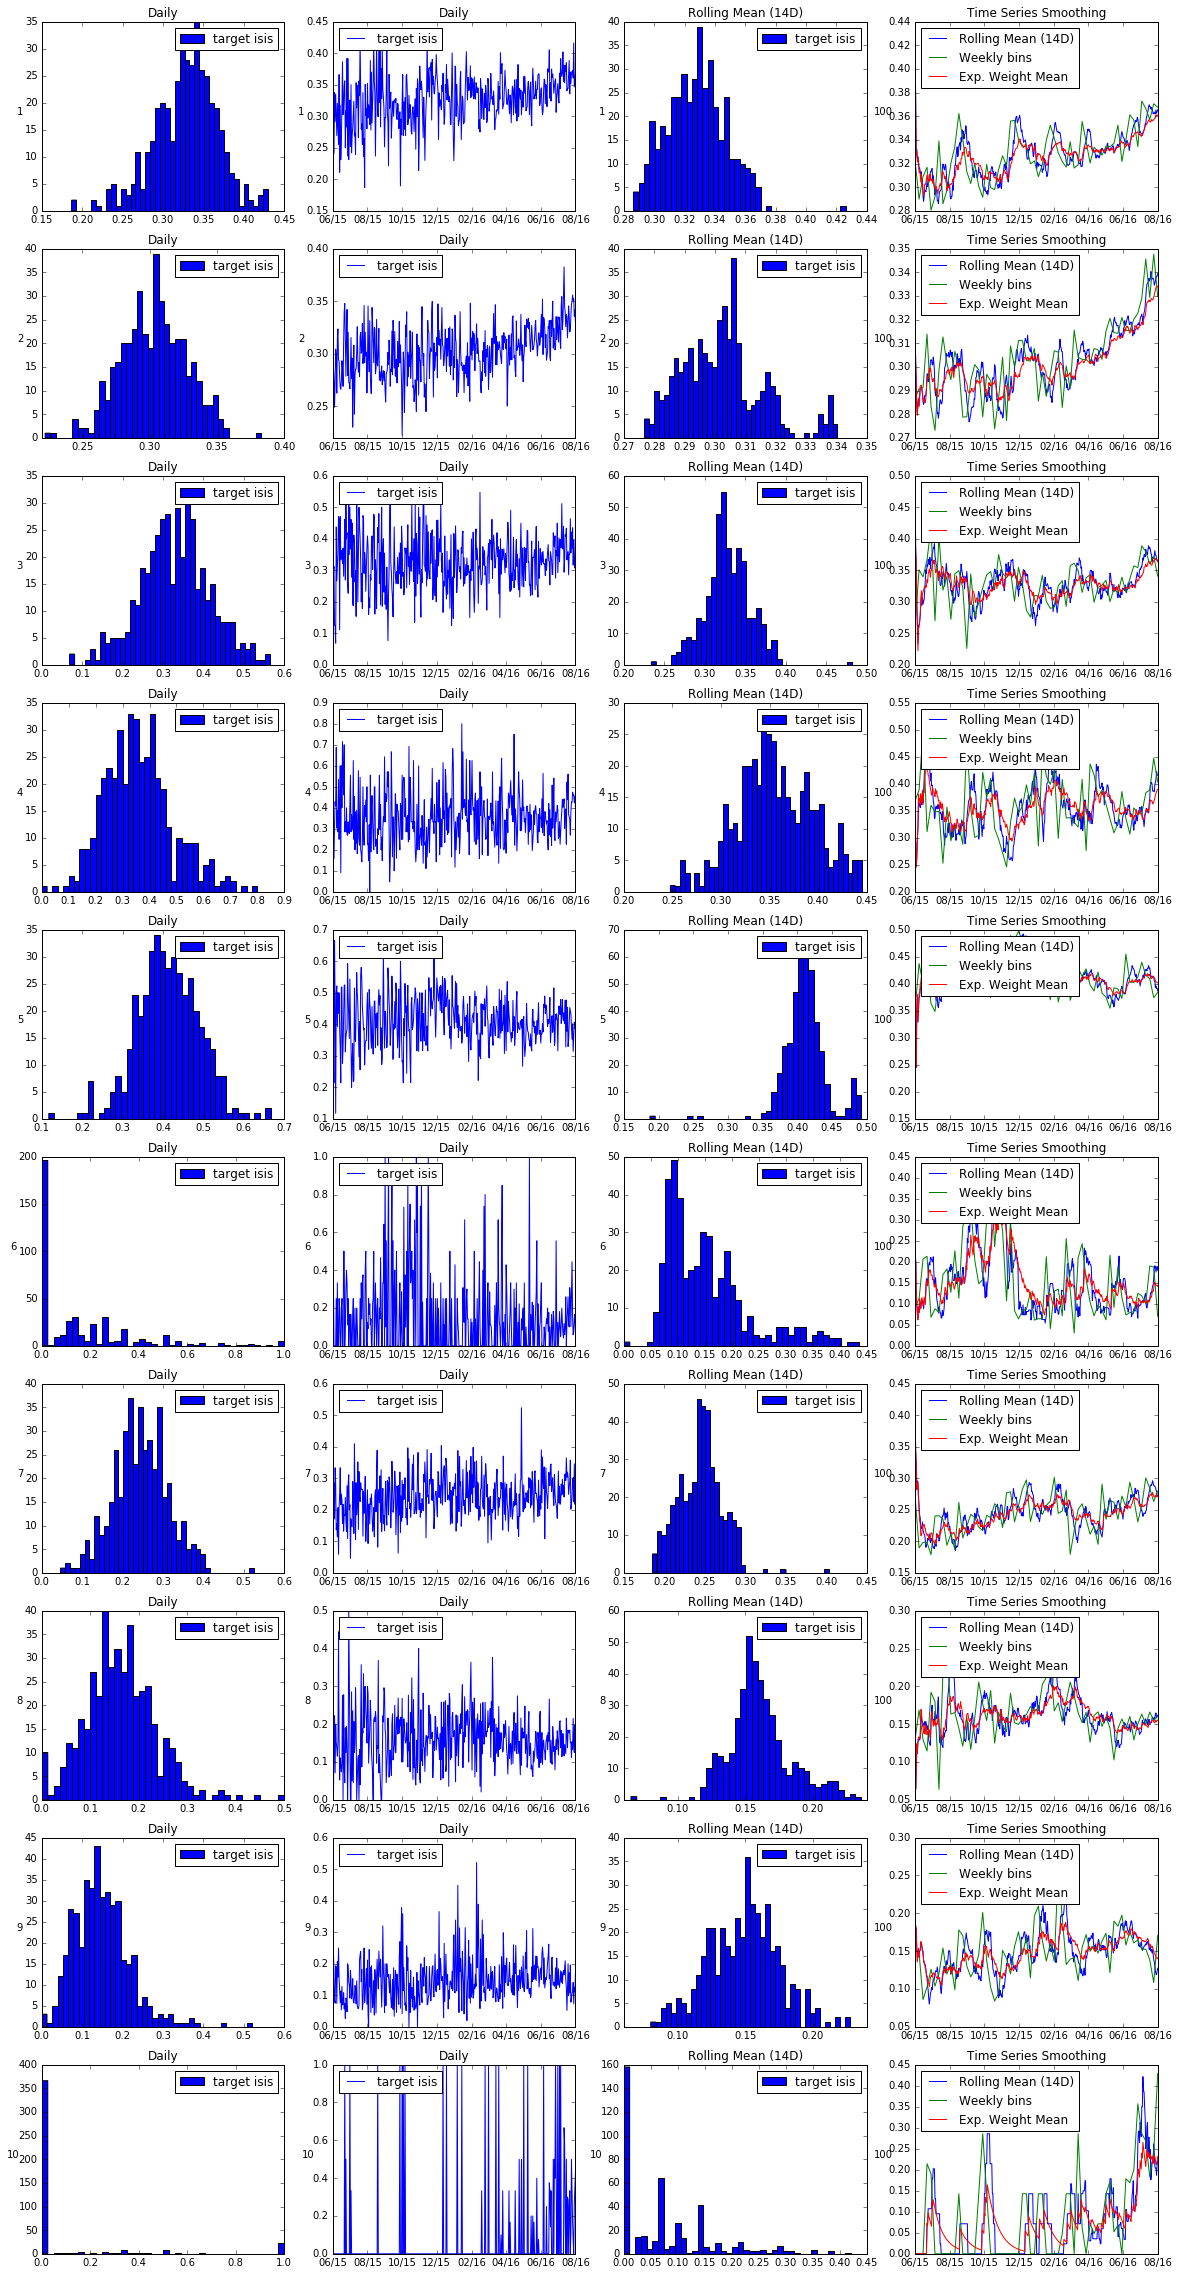

In [97]:
all_data = doPlot("By Playlist (Daily)","by_playlist_ci",20,40)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


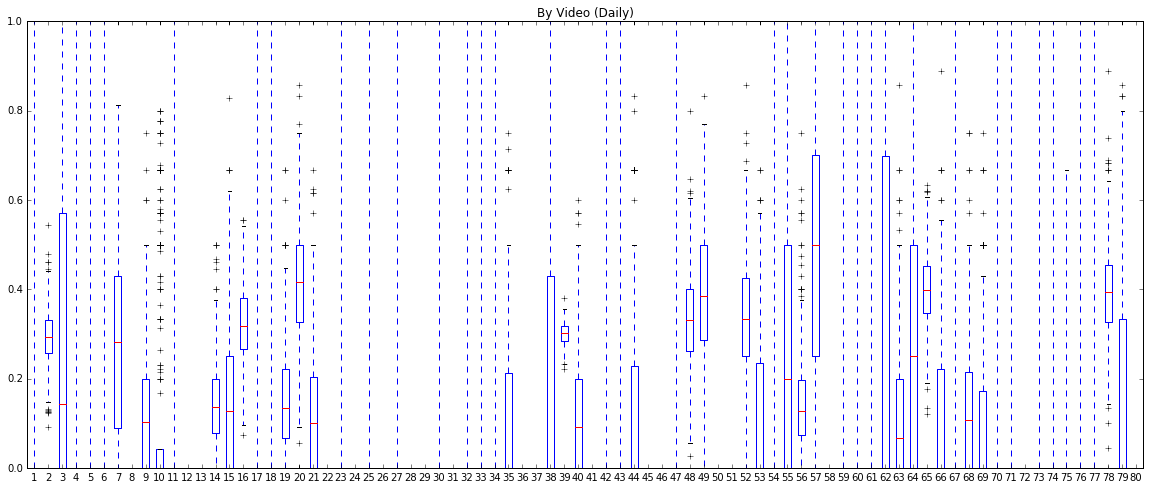

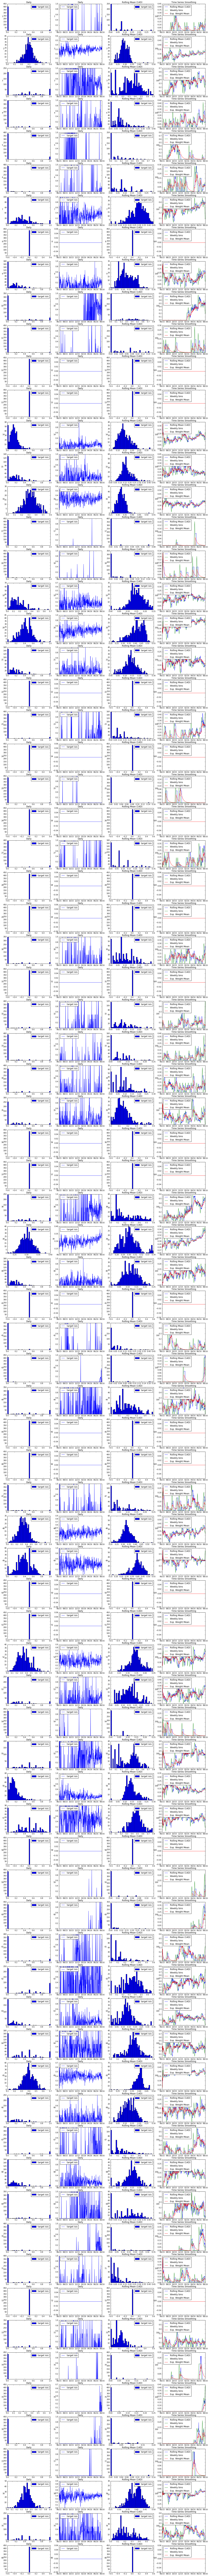

In [98]:
all_data = doPlot("By Video (Daily)","ci",20,260)

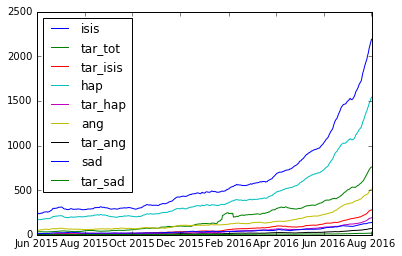

In [41]:
plt.figure(3)
which = 1
#plt.plot(all_data[which].total.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].isis.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].target_total.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].target_isis.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].happy.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].target_happy.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].angry.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].target_angry.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].sad.rolling(min_periods=1,window=14,center=False).mean())
plt.plot(all_data[which].target_sad.rolling(min_periods=1,window=14,center=False).mean())
plt.legend(["isis","tar_tot","tar_isis","hap","tar_hap","ang","tar_ang","sad","tar_sad"],loc="upper left")
plt.show()